In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("life_insurance.csv")

In [3]:
data

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84
5,6,73,86
6,7,35,32
7,8,110,104
8,9,44,38
9,10,82,107


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SALESPERSON,30.0,15.500000,8.803408,1.0,8.25,15.5,22.75,30.0
Old Scheme (in thousands),30.0,68.033333,20.455980,28.0,54.00,67.0,81.50,110.0
New Scheme (in thousands),30.0,72.033333,24.062395,32.0,55.00,74.0,85.75,122.0


In [5]:
import seaborn as sns
sns.distplot(data['Old Scheme (in thousands)'])

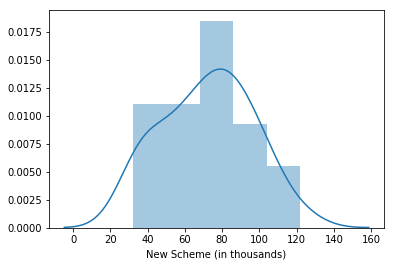

In [6]:
sns.distplot(data['New Scheme (in thousands)'])

#### Find the mean of old scheme and new scheme column. (5 points)

In [7]:
oldsch_mean = data["Old Scheme (in thousands)"].mean()
oldsch_mean
#mean of old scheme

68.03333333333333

In [8]:
newsch_mean = data["New Scheme (in thousands)"].mean()
newsch_mean
#mean of new scheme

72.03333333333333

##### Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)

In [9]:
#Old scheme looks more normally disributed then new scheme but overall both are very close to normally distibuted 
##with almost similar mean and std


In [10]:
from scipy import stats

In [11]:
from scipy.stats import ttest_rel # two sample paired test will be applied as samples of the same group at different points in time

t_stats, p_value = ttest_rel(data['New Scheme (in thousands)'],data['Old Scheme (in thousands)'], nan_policy='propagate')

In [12]:
t_stats, p_value

(1.5559143823544377, 0.13057553961337662)

##### What conclusion does the test (p-value) lead to? (2.5 points)

In [13]:
#we accpet the null hypothesis of equal means as value of p > 0.05 and hence the new scheme did not 
##raise the output significantly.

##### Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
#### a) The probability of a type 1 error? (2.5 points)

        

In [14]:
#probability of type 1 error is 0.05 i.e. 5%

###### b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)

      

In [15]:
t_stats, p_value = ttest_rel(data['New Scheme (in thousands)'],data['Old Scheme (in thousands)'], nan_policy='propagate')

In [16]:
t_stats, p_value

(1.5559143823544377, 0.13057553961337662)

In [22]:
#we accpet the null hypothesis  as value of p > 0.05 and hence conclude that the mean differnce is less then $5000 
### which is $4000 in this case

In [19]:
mean_diff = data['New Scheme (in thousands)'].mean() - data['Old Scheme (in thousands)'].mean()
mean_diff

4.0

###### c) Power of the test (5 points)

In [23]:
from statsmodels.stats.power import ttest_power

In [30]:
data['Old Scheme (in thousands)'].var()

418.4471264367816

In [29]:
data['New Scheme (in thousands)'].var()

578.9988505747128

In [32]:
de = (4.0 / np.sqrt(((30-1)*418.45 + (30-1)*579 / 60-2)))

In [33]:
de

0.03590239022621925

In [34]:
print(ttest_power(de, nobs=30, alpha=0.05, alternative="two-sided"))

0.054155260991041676
